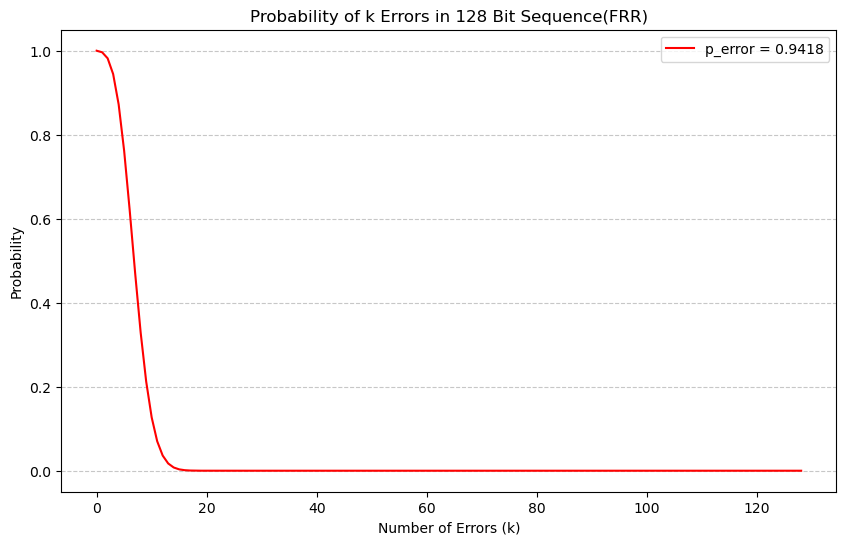

In [1]:
#FRR theoretical value 
from scipy.stats import binom
import matplotlib.pyplot as plt

# Given values
n = 128  # total number of trials (bits)
p_errors = [1 - 0.9418]  # probabilities of error for each bit
colors = ['red']  # colors for each curve

# Plotting
plt.figure(figsize=(10, 6))

for p_error, color in zip(p_errors, colors):#You can compare them by typing in different reliabilities
    # Calculate probabilities for having k errors where k is from 0 to n
    k_values = range(n + 1)  # 0 to n errors
    probabilities = [1-binom.cdf(k, n, p_error) for k in k_values]

    plt.plot(k_values, probabilities, label=f'p_error = {1 - p_error:.4f}', color=color)

plt.title('Probability of k Errors in 128 Bit Sequence(FRR)')
plt.xlabel('Number of Errors (k)')
plt.ylabel('Probability')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


In [ ]:
# Comparison of theoretical and actual values(FRR FAR)

# Probability function theoretical value calculation, just change n
from scipy.stats import binom
import matplotlib.pyplot as plt

# Given values
n = 128  # total number of trials (bits)
p1_error = 1 - 0.9418  # probability of error for each bit
p2_error = 0.4809  # probability of error for each bit

hex_seq1 = read_hex_from_file("biaozhun.txt")
hex_seq2 = read_hex_from_file("20.txt")
bin_seq1 = hex_to_bin(hex_seq1)
bin_seq2 = hex_to_bin(hex_seq2)

# Calculate cumulative probabilities for having k or fewer errors where k is from 0 to 128
k_values = range(n + 1)  # 0 to 128 errors
cumulative_probabilities1 = [1 - binom.cdf(k, n, p1_error) for k in k_values]
cumulative_probabilities2 = [binom.cdf(k, n, p2_error) for k in k_values]

# Compare every 128 bits and count
block_size = 128
differences = []
for i in range(0, min(len(bin_seq1), len(bin_seq2)), block_size):
    block1 = bin_seq1[i:i + block_size]
    block2 = bin_seq2[i:i + block_size]
    diff = hamming_distance(block1, block2)
    differences.append(diff)

# Count the occurrence of different bit numbers
difference_counts = {i: differences.count(i) for i in set(differences)}

# Print results
for diff, count in difference_counts.items():
    print(f"{diff} bits different: {count} times")

import matplotlib.pyplot as plt

total_blocks = len(differences)
frequencies = {diff: count / total_blocks for diff, count in difference_counts.items()}
sorted_frequencies = dict(sorted(frequencies.items()))

# Calculate cumulative frequency
cumulative_frequencies = {}
cumulative_frequency = 0
for diff, freq in sorted_frequencies.items():
    cumulative_frequency += freq
    cumulative_frequencies[diff] = 1 - cumulative_frequency  

hex_seq11 = read_hex_from_file("biaozhun.txt")
bin_seq11 = hex_to_bin(hex_seq11)

# Compare every 128 bits and count
everycount11 = []

for nn in range(block_size + 1):
    num = 0
    for i in range(0, min(len(bin_seq11), len(bin_seq11)), block_size):
        block11 = bin_seq11[0:block_size]
        block22 = bin_seq11[i:i + block_size]
        diff = hamming_distance(block11, block22)
        if diff <= nn:
            num = num + 1
    everycount11.append(num)    

# Calculating the normalized values for the y-axis
y_values = [(count - 1) / (64 * 128 * 1024 / n) for count in everycount11]
# X-axis values from 0 to 24
x_values = list(range(block_size + 1))

# Plot cumulative frequency chart
plt.figure(figsize=(10, 6))
plt.plot(k_values, cumulative_probabilities1, color='r')
plt.plot(k_values, cumulative_probabilities2, color='b')
plt.scatter(list(cumulative_frequencies.keys()), list(cumulative_frequencies.values()), color='green', marker='o')
plt.scatter(x_values, y_values, marker='o', linestyle='-', color='yellow')
plt.title('Cumulative Frequency of Bit Differences per bits Block')
plt.xlabel('Number of Bit Differences')
plt.ylabel('Cumulative Frequency')
plt.grid(True)

plt.show()

# Outputting the coordinates for LaTeX plotting
k_values_cumulative_probabilities1 = list(zip(k_values, cumulative_probabilities1))
k_values_cumulative_probabilities2 = list(zip(k_values, cumulative_probabilities2))
cumulative_frequencies_coordinates = list(cumulative_frequencies.items())
x_values_y_values_coordinates = list(zip(x_values, y_values))

k_values_cumulative_probabilities1, k_values_cumulative_probabilities2, cumulative_frequencies_coordinates, x_values_y_values_coordinates


In [5]:
#EER
from scipy.stats import binom
import matplotlib.pyplot as plt

# Given values
n =8  # total number of trials (bits)
p1_error = 1-0.9418 
p2_error = 0.4809  

TPRs = [binom.cdf(k, n, p1_error) for k in range(n + 1)]
FPRs = [binom.cdf(k, n, p2_error) for k in range(n + 1)]

FNRs = [1 - tpr for tpr in TPRs]
diffs = [abs(fpr - fnr) for fpr, fnr in zip(FPRs, FNRs)]
min_diff_index = diffs.index(min(diffs)) 
eer_threshold = min_diff_index

print("EER:", eer_threshold)
print("FAR FRR:", FPRs[eer_threshold], 1-TPRs[eer_threshold])

EER: 1
FAR FRR: 0.044347666618581 0.07502850453539711
